## Exploratory Data Analysis on Trump's Tweet

### Goals

1. What are the top 20 most used words in the data? And how do they change over the time period?
2. Whether there are different people running Trump’s account: eg. sending device, time period, tweet?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import math

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Viewing the Data

In [48]:
trump_tweets = pd.read_csv("data/tweets_scraped_11_07_2019.csv")
print(len(trump_tweets))

12323


In [49]:
trump_tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False,796315640307060738
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False,796797436752707585
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False,796897928048766976
3,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False,796900183955095552
4,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False,797034721075228672


In [50]:
trump_tweets.describe()

,retweet_count,favorite_count,id_str
count,12323.000000,12323.000000,1.232300e+04
mean,18573.566339,67049.472125,1.050969e+18
std,12417.851632,52784.541328,1.126138e+17
min,2.000000,0.000000,7.963156e+17
25%,11316.000000,28964.500000,9.623379e+17
50%,16690.000000,69022.000000,1.075722e+18
75%,23166.000000,96076.500000,1.150386e+18
max,369530.000000,879647.000000,1.192468e+18


### Word Frequency Analysis

We're hoping to have a sense of the topics that Donald Trump touch upon the most. From a generic sense, the words in Trump's tweet demonstrates the topic about which a tweet is concerning. We want to have a sense of Trump's favorite topics by seeing what his favorite words are. Furthermore, by tracking the frequency trend of a speicific word, we can also understand which topics were Trump paying attention to. For example, if Trump's tweets see an increasing frequency of words regarding international trade, stock market, U.S. and world economy, then it means that he may be paying more attention to similar topics. This increased attention would be likely correlated to the VIX index. Therefore, in this section, we lay the groundwork for the word frequency analysis, identifying popular words used by Donald Trump.

To achieve the goal, we use `textblob` package. We then inflect and lemmatize the textblob we got from the package for a word frequency analysis, to remove the impact of tenses and other factors.

To approach this problem, we first concatnate all of Donald Trump's tweets, and produce a textblob containing all of our collected tweets. We then extract all the nouns in the text blobs, since we're hoping to identify the prominent topics he's interested in, and nouns will give us the best insights of that. After extracting nouns, we singularize and lemmatize the nouns to ensure that all similar nouns with the same root are treated in the same way.

In [28]:
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [8]:
trump_tweets['text_blob'] = trump_tweets['text'].apply(lambda text: TextBlob(text))

In [9]:
trump_tweets['words'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.words.singularize().lemmatize())

In [10]:
trump_tweets['noun_phrases'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.noun_phrases)

In [11]:
trump_tweets['noun_phrases'] = trump_tweets['noun_phrases'].apply(lambda noun_list: noun_list.singularize().lemmatize())

In [40]:
all_trump_blob = TextBlob(trump_tweets['text'].str.cat())
all_trump_noun = all_trump_blob.noun_phrases
[word for word in all_trump_noun if word not in stops]
all_trump_noun = lemmatize().singularize()
# all_trump_nouns = all_trump_blob.noun_phrases.singularize().lemmatize()

# bow = CountVectorizer()
# BOW = bow.fit_transform(all_trump_blob)
# bagOFwords = pd.DataFrame(BOW.toarray())
# bagOFwords.columns = bow.get_feature_names()


# vectorizer = TfidfVectorizer()
# got_tfidf = vectorizer.fit_transform(list(all_trump_blob))
# tfidf = pd.DataFrame(got_tfidf.toarray())
# tfidf.columns = vectorizer.get_feature_names()


KeyboardInterrupt: 

In [36]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(all_trump_blob)

train_vect

<339291x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 128446 stored elements in Compressed Sparse Row format>

In [37]:
tfidf.get_feature_names()

['00',
 '06',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '20',
 '2016',
 '2017',
 '2018',
 '2020',
 '23',
 '24',
 '25',
 '2nd',
 '30',
 '50',
 'abc',
 'abe',
 'able',
 'absolutely',
 'abuse',
 'accomplished',
 'account',
 'acros',
 'act',
 'acting',
 'action',
 'actually',
 'adam',
 'additional',
 'addres',
 'administration',
 'advantage',
 'african',
 'afternoon',
 'agenda',
 'agent',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'air',
 'al',
 'alabama',
 'alien',
 'allow',
 'allowed',
 'alway',
 'amazing',
 'amazon',
 'ambassador',
 'amendment',
 'america',
 'american',
 'amp',
 'andrew',
 'angry',
 'announce',
 'announced',
 'answer',
 'anthem',
 'anti',
 'anymore',
 'apologize',
 'approval',
 'approved',
 'area',
 'arizona',
 'arrived',
 'ask',
 'asked',
 'asking',
 'attack',
 'attorney',
 'away',
 'bad',
 'badly',
 'bank',
 'barr',
 'barrier',
 'based',
 'beat',
 'beautiful',
 'begin',
 'beginning',
 'behalf',
 'believe',
 'benefit',
 'bernie',
 'best',
 'bett

If we do not remove the nouns in our corpus, the 20 most frequent word obtained by TF-IDF algorithm are:

In [39]:
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'], ascending=False)


,idf_weights
single,10.238109
accomplished,10.238109
sadly,10.238109
helped,10.238109
tuckercarlson,10.238109
position,10.238109
monday,10.238109
importantly,10.238109
inaccurate,10.238109
trip,10.238109


### Tweet Published By?

Whether a tweet is published by Trump would also influence people's judgment, thereby impacting the market. We assume that the tweets published by Trump himself would have the largest impact on the market. Twitter provides information regarding how the tweets were posted, and here we count how many tweets were published by each source. Comparing them and trying to infer who's posting the tweets appearing on @realdonaldtrump.

We find that most of the tweets were published by `Twitter for iPhone`, followed by `Twitter for Android`.

In [60]:
tweet_source = trump_tweets.groupby('source').count()['text']
tweet_source

source
Media Studio              155
Twitter Ads                34
Twitter Media Studio      119
Twitter Web App             4
Twitter Web Client         65
Twitter for Android       436
Twitter for iPad           38
Twitter for iPhone      11472
Name: text, dtype: int64

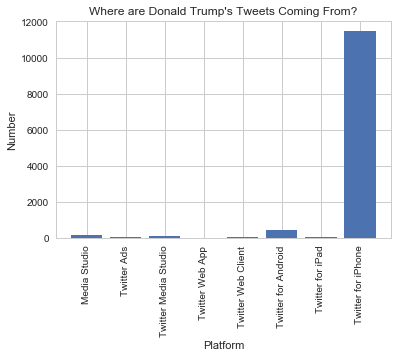

In [67]:
plt.bar(tweet_source.index, tweet_source)
plt.title('Where are Donald Trump\'s Tweets Coming From?')
plt.xlabel('Platform')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

In [62]:
tweet_source.index

Index(['Media Studio', 'Twitter Ads', 'Twitter Media Studio', 'Twitter Web App', 'Twitter Web Client', 'Twitter for Android', 'Twitter for iPad', 'Twitter for iPhone'], dtype='object', name='source')